<a href="https://colab.research.google.com/github/xxrjun/intro-to-data-science/blob/main/HW1/HW1_109403019_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1-109403019

Student Info: MIS 3A 109403019 鄒翔宇

# Prerequisite

Using PyDrive to load the data from Google Drive.

We are first required to install the PyDrive library f from the python installer(pip) and **execute** the following.

References from [Ways to import CSV files in Google Colab - GeekforGeeks](https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/).

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Import library we needed.


In [ ]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Enable matplotlib to support 繁體中文 finely, otherwise we would get the *RuntimeWarning: Glyph xxxxx missing from current font*.

References from [Colab 進行matplotlib繪圖時顯示繁體中文](https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb#scrollTo=GJWjDw-iNdCm).

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2022-10-04 08:22:32--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.163.138, 142.251.163.100, 142.251.163.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ifculg6ovv8e8b8alnp0c036sqrgbnm0/1664871750000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=bc0a9e29-2ff7-40ec-bb2a-b4d97b0aadf4 [following]
--2022-10-04 08:22:36--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ifculg6ovv8e8b8alnp0c036sqrgbnm0/1664871750000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=bc0a9e29-2ff7-40ec-bb2a-b4d97b0aadf4
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to d

# 1. Please write code in Colab to read the table and report its size (# of columns and rows)

In [ ]:
# The sharable link of data we would use
link = 'https://drive.google.com/file/d/1-1pxROWH91P54OGDSzkfCfkCuEgGNllr/view?usp=sharing' 

# to get the id part of the file
id = link.split("/")[-2]


file_name = 'group_summary_table_20220929.csv'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name) 

tbl = Table.read_table(file_name)
tbl.show()  # show the entire table to find the anomaly row

性別,入學管道,離校院別名稱(中),num_students,credits_mean,credits_std,gpa_mean,gpa_std
女,學士班(指考分發/聯考),地球科學學院,95,152.642,15.29,78.1504,7.17645
女,學士班(指考分發/聯考),客家學院,17,151.824,16.7639,80.1531,6.12428
女,學士班(指考分發/聯考),工學院,174,151.075,16.5397,78.8585,6.41941
女,學士班(指考分發/聯考),文學院,686,154.219,20.8801,79.4352,5.83358
女,學士班(指考分發/聯考),文學院中國文學系,1,172,nan,85.0756,nan
女,學士班(指考分發/聯考),理學院,191,149.953,13.3548,77.0528,6.97312
女,學士班(指考分發/聯考),生醫理工學院,76,151.961,17.8044,78.398,7.0676
女,學士班(指考分發/聯考),管理學院,756,152.718,14.3223,78.5168,6.68581
女,學士班(指考分發/聯考),資訊電機學院,119,150.126,14.8715,81.3947,6.56094
女,學士班申請入學,地球科學學院,134,155.507,15.7703,79.731,7.3229


Print out the # of rows and the # of this table.

In [ ]:
print('# of columns:', tbl.num_columns) 

print('# of rows: ', tbl.num_rows)

# of columns: 8
# of rows:  49


# 2. Which row looks like an anomaly and should be removed? Why?

Find those rows whose values in column *num_students* are pretty low(<= 5) and remove them.

Because they would lead their own mean value and the standard deviation value to be meaningless when compared with other colleges

In [ ]:
threshold = 5

tbl.where('num_students', are.below_or_equal_to(threshold))

性別,入學管道,離校院別名稱(中),num_students,credits_mean,credits_std,gpa_mean,gpa_std
女,學士班(指考分發/聯考),文學院中國文學系,1,172,nan,85.0756,nan
男,繁星推薦,客家學院,1,137,nan,87.8686,nan


Get the updated table and show it.

In [ ]:
# return an updated table that have a certain feature
updated_tbl = tbl.where('num_students', are.above(threshold))

# show the entire table to check whether our result table is correct
updated_tbl.show()  

性別,入學管道,離校院別名稱(中),num_students,credits_mean,credits_std,gpa_mean,gpa_std
女,學士班(指考分發/聯考),地球科學學院,95,152.642,15.29,78.1504,7.17645
女,學士班(指考分發/聯考),客家學院,17,151.824,16.7639,80.1531,6.12428
女,學士班(指考分發/聯考),工學院,174,151.075,16.5397,78.8585,6.41941
女,學士班(指考分發/聯考),文學院,686,154.219,20.8801,79.4352,5.83358
女,學士班(指考分發/聯考),理學院,191,149.953,13.3548,77.0528,6.97312
女,學士班(指考分發/聯考),生醫理工學院,76,151.961,17.8044,78.398,7.0676
女,學士班(指考分發/聯考),管理學院,756,152.718,14.3223,78.5168,6.68581
女,學士班(指考分發/聯考),資訊電機學院,119,150.126,14.8715,81.3947,6.56094
女,學士班申請入學,地球科學學院,134,155.507,15.7703,79.731,7.3229
女,學士班申請入學,客家學院,31,161.677,32.0639,83.1672,5.32421


In [ ]:
print('# of rows after updated: ', updated_tbl.num_rows, '\n')

print('Total rows have been removed: ', tbl.num_rows - updated_tbl.num_rows)

# of rows after updated:  47 

Total rows have been removed:  2


# 3. Are there more girls than boys?

Use `group` and `select` to find the # of boys and the # of girls.

In [ ]:
# Get the table grouped by gender, also with num_students sum column
num_students_group_by_gender = updated_tbl.group('性別', sum).select('性別', 'num_students sum')

num_students_group_by_gender.show()
print()

# Get the # of boys and the # of girls to find out whether there more girls than boys.
num_female_students = num_students_group_by_gender.column('num_students sum').item(0)
num_male_students = num_students_group_by_gender.column('num_students sum').item(1)

print('Are there more girls than boys? ', num_female_students > num_male_students)

性別,num_students sum
女,3969
男,6972



Are there more girls than boys?  False


Create a new column to find the percentage of students are female or male.

In [ ]:
total_students = num_female_students + num_male_students

num_students_group_by_gender = num_students_group_by_gender.with_columns(
    '%', num_students_group_by_gender.column('num_students sum')/total_students 
)

num_students_group_by_gender

性別,num_students sum,%
女,3969,0.362764
男,6972,0.637236


# 4. Which college has the most graduates?

Use `group`, `select` and `sort` to find which college has the most graduates.

In [ ]:
# Get the table grouped by college, also with num_students sum column.
num_students_group_by_college = updated_tbl.group('離校院別名稱(中)', sum).select('離校院別名稱(中)', 'num_students sum')

# Show sum of grauates of all college.
num_students_group_by_college.sort('num_students sum', descending=True).show()

離校院別名稱(中),num_students sum
管理學院,2542
工學院,2217
資訊電機學院,2045
理學院,1653
文學院,1212
地球科學學院,849
生醫理工學院,336
客家學院,87


In [ ]:
college_has_most_graduates = num_students_group_by_college.sort('num_students sum', descending=True).column(0).item(0)
num_most_graduates = num_students_group_by_college.sort('num_students sum', descending=True).column(1).item(0)

print('College that has the most graduates is:', college_has_most_graduates, ' which has ', num_most_graduates, 'graduates')

College that has the most graduates is: 管理學院  which has  2542 graduates


Plot a bar chart to show the distribution of # of graduates by college and sort it in descending order.

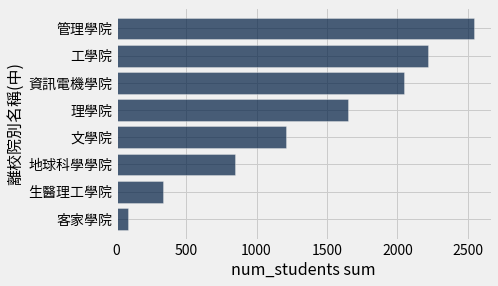

In [ ]:
num_students_group_by_college.sort('num_students sum', descending=True).barh('離校院別名稱(中)')

# 5. Which college has the most unbalanced 入學管道? In other words, we say it’s balanced if each 管道 has a similar number of graduates.


Use `group` and `pivot` methods to show a pivot table, where 入學管道 and college in vertical and horizon directions, respectively, and each cell shows a total number of students.

In [ ]:
# Get the table 
num_students_group_by_entrance = updated_tbl.group(['入學管道', '離校院別名稱(中)'], sum).select('入學管道', '離校院別名稱(中)' ,'num_students sum')

# Get the pivot table
pivot_table = num_students_group_by_entrance.pivot(columns='入學管道', rows='離校院別名稱(中)', values='num_students sum', collect=sum)

pivot_table.show()

離校院別名稱(中),學士班(指考分發/聯考),學士班申請入學,繁星推薦
地球科學學院,376,368,105
客家學院,25,54,8
工學院,1231,635,351
文學院,850,204,158
理學院,928,462,263
生醫理工學院,185,64,87
管理學院,1488,659,395
資訊電機學院,774,874,397


Plot a bar chart to show the distribution of # of graduates by college and 入學管道.

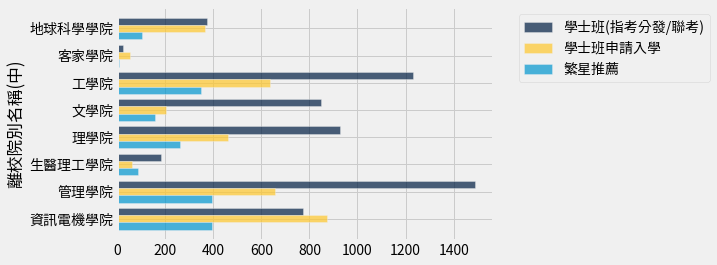

In [ ]:
pivot_table.barh('離校院別名稱(中)')

We can speculate 管理學院 has the most imbalanced distrubition of # of graduates by college and 入學管道 through above bar chart.

To prove our speculation, I calculate the standard devition and add it as a column to our pivot table.

Then, print the pivot_table with sorting.

In [ ]:
import statistics

def calculate_stdev(entrance1, entrance2, entrance3):
  return statistics.stdev([entrance1, entrance2, entrance3])

pivot_table = pivot_table.with_column(
    'Unbalance Level(std)', pivot_table.apply(calculate_stdev, '學士班(指考分發/聯考)', '學士班申請入學', '繁星推薦')
)

pivot_table.sort('Unbalance Level(std)', descending=True)

離校院別名稱(中),學士班(指考分發/聯考),學士班申請入學,繁星推薦,Unbalance Level(std)
管理學院,1488,659,395,570.319
工學院,1231,635,351,449.124
文學院,850,204,158,386.932
理學院,928,462,263,341.317
資訊電機學院,774,874,397,251.547
地球科學學院,376,368,105,154.204
生醫理工學院,185,64,87,64.2573
客家學院,25,54,8,23.2594


管理學院 is on the top, so our speculation is correct!